In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
from data import *
from load_atoms import load_dataset
from ase.io import read, extxyz
import numpy as np
import matplotlib.pyplot as plt
import jax
import matplotlib.pyplot as plt
from model import Nequix
import pickle

In [2]:
species = [1, 6, 7, 8, 16]
atomic_indices = atomic_numbers_to_indices(species)

In [ ]:
ds = load_dataset('QM7', 'data')
with open('data/densities.pkl', 'rb') as f:
    densities = pickle.load(f)

for i, atom in enumerate(ds):
    atom.set_cell(np.eye(3))
    atom.info['P'] = densities['densities'][i]

extxyz.write_extxyz('data/QM7.extxyz', ds)

Output()

In [8]:
graph_ds = Dataset('data/QM7.extxyz', atomic_indices)
dl = DataLoader(graph_ds, 23, 490, 15, 210, 64)

In [10]:
a, gt, mask = next(iter(dl))
a

GraphsTuple(nodes={'positions': array([[ 0.99826, -0.00246, -0.00436],
       [ 2.09021, -0.00243,  0.00414],
       [ 0.63379,  1.02686,  0.00414],
       ...,
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ]], dtype=float32), 'species': array([1, 0, 0, ..., 0, 0, 0], dtype=int32)}, edges={'shifts': array([[ 0., -1., -1.],
       [ 0., -1., -1.],
       [ 0., -1., -1.],
       ...,
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)}, receivers=array([  0,   0,   0, ..., 640, 640, 640], dtype=int32), senders=array([  1,   2,   3, ..., 640, 640, 640], dtype=int32), globals=array([[[ 2.06576157e+00, -2.03388795e-01, -1.29640584e-05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.03388795e-01,  7.97058642e-01, -7.90893228e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.29640584e-05, -7.90893228e-06,  6.51722670e-01, ...,


In [29]:
model = Nequix(jax.random.key(69), basis='sto-3g')

In [30]:
a, gt, mask = next(iter(dl))
P = model(a)

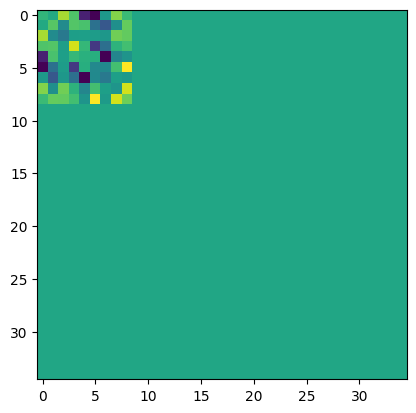

In [34]:
plt.imshow(P[0])